In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [4]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-12-14,3389.979980,3328.800049,3351.000000,3381.830078,2798800.0,3381.830078,AMAZON
2021-12-15,3472.000000,3303.899902,3371.959961,3466.300049,3789700.0,3466.300049,AMAZON
2021-12-16,3483.320068,3363.209961,3467.370117,3377.419922,3043800.0,3377.419922,AMAZON
2021-12-17,3417.969971,3312.270020,3354.209961,3400.350098,4277100.0,3400.350098,AMAZON
2021-12-20,3357.489990,3312.000000,3337.000000,3341.580078,2868600.0,3341.580078,AMAZON
2021-12-21,3414.330078,3312.949951,3357.010010,3408.340088,2797800.0,3408.340088,AMAZON
2021-12-22,3441.000000,3370.010010,3385.399902,3420.739990,2751800.0,3420.739990,AMAZON
2021-12-23,3439.500000,3403.000000,3408.560059,3421.370117,1837500.0,3421.370117,AMAZON
2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400.0,3393.389893,AMAZON


In [5]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,141.810593,138.920751,140.324111,140.443241,9.116588e+07,140.054560
std,14.145683,13.808442,13.862101,14.064238,2.911851e+07,14.243743
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.819870
25%,130.449997,127.129997,128.779999,128.979996,6.990710e+07,128.189728
50%,141.399994,136.699997,139.470001,139.139999,8.696030e+07,138.937225
75%,149.729996,147.509995,148.679993,148.789993,1.074970e+08,148.550323
max,182.130005,178.529999,181.119995,180.330002,1.954327e+08,180.330002


In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-12-28 to 2021-12-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


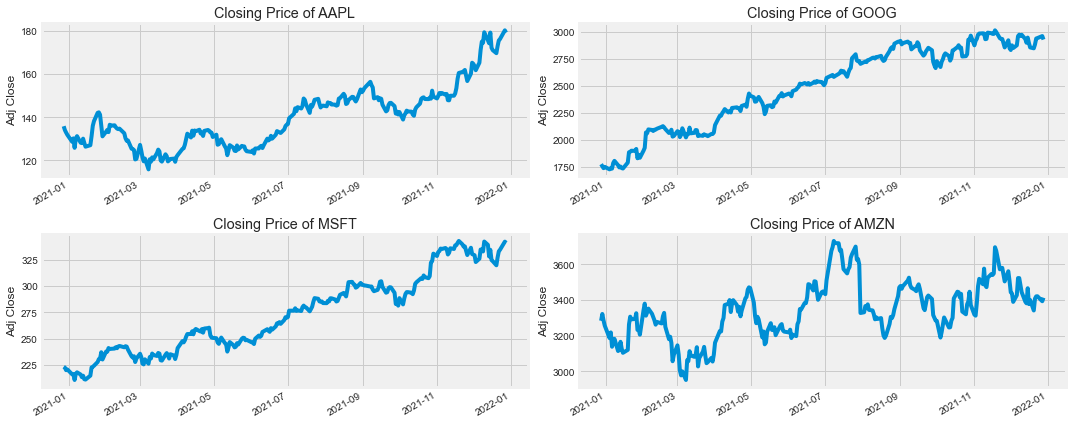

In [7]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

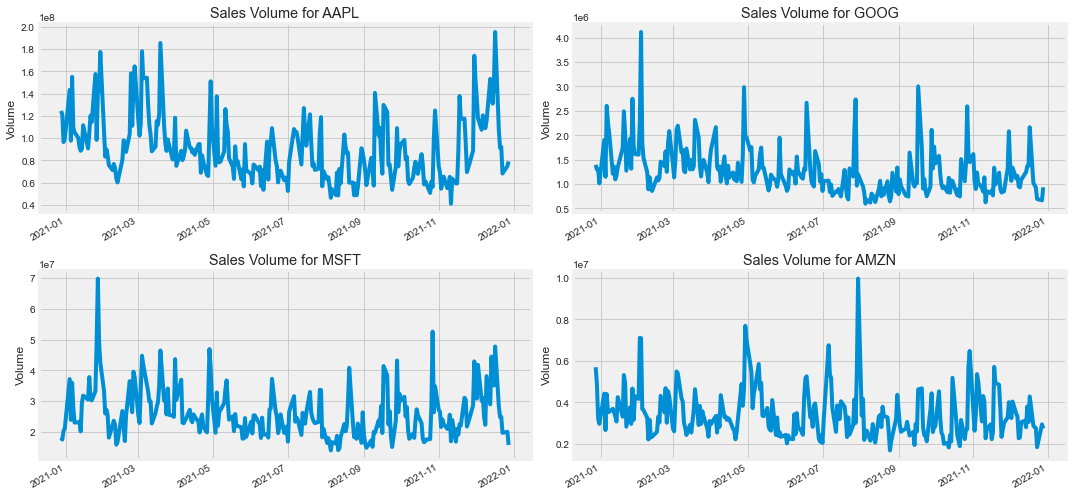

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [10]:
#print(GOOG.columns)


In [11]:
#df.groupby("company_name").hist(figsize=(12, 12));

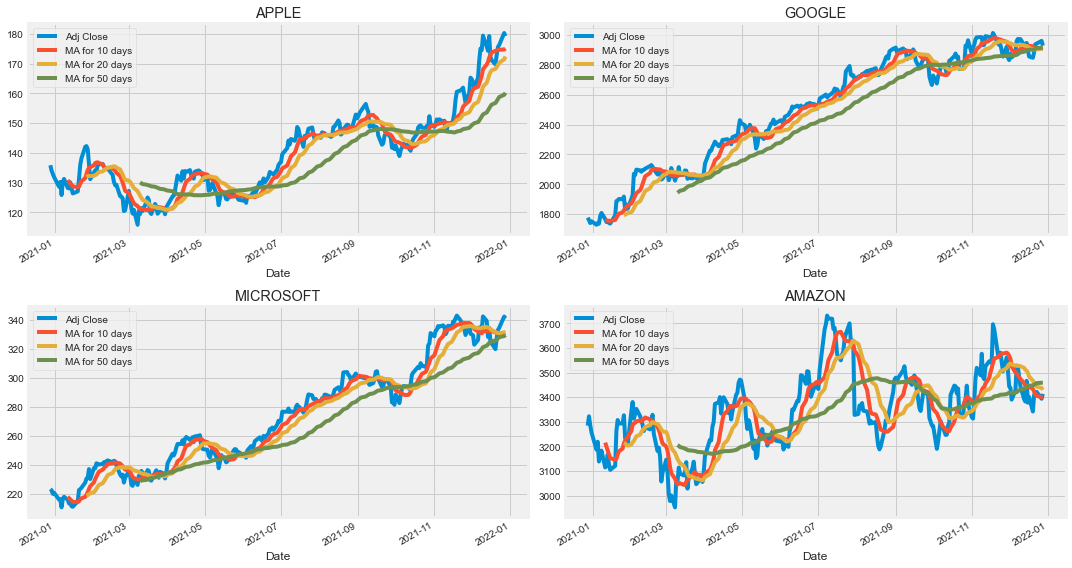

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

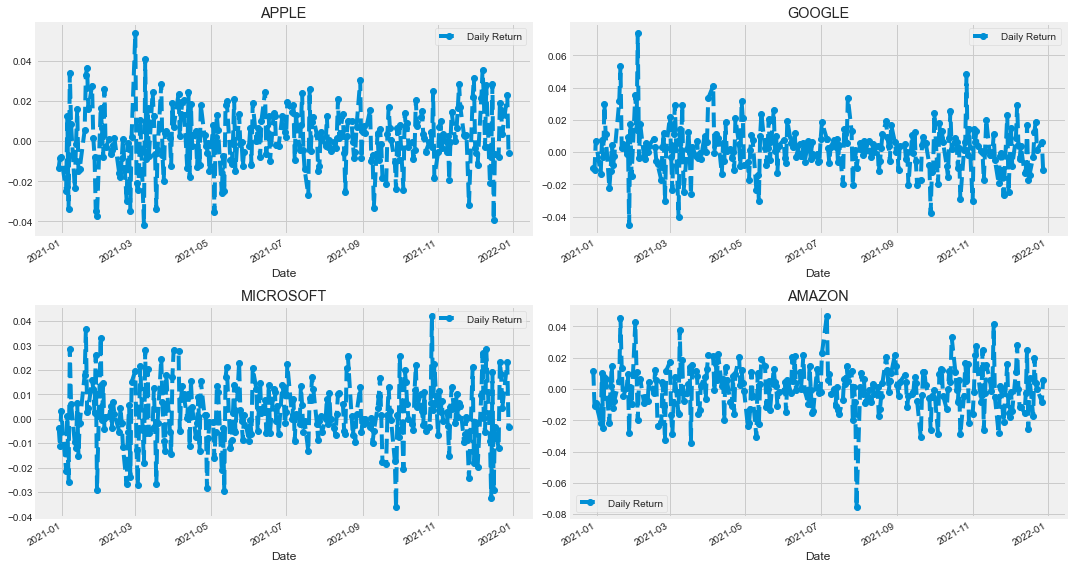

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

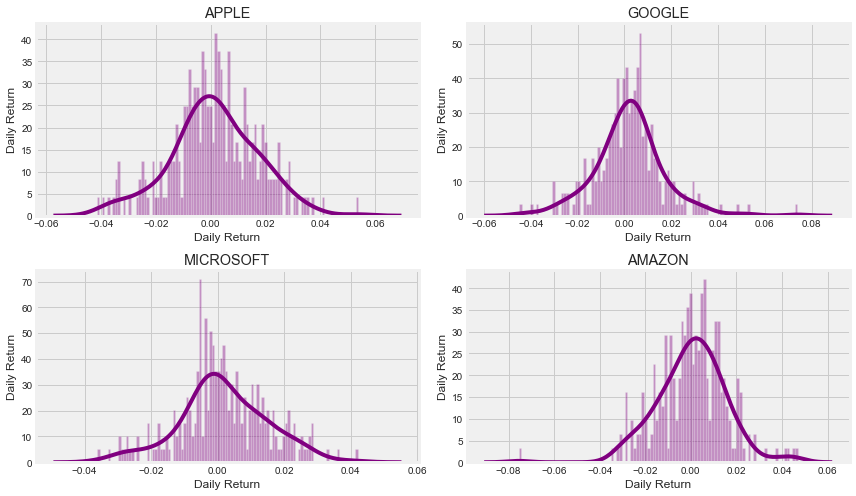

In [14]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-12-28,135.852493,1776.089966,223.089996,3283.959961
2020-12-29,134.043655,1758.719971,222.286713,3322.000000
2020-12-30,132.900696,1739.520020,219.837250,3285.850098
2020-12-31,131.877014,1751.880005,220.571106,3256.929932
2021-01-04,128.617111,1728.239990,215.880432,3186.629883


In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-12-28,NaN,NaN,NaN,NaN
2020-12-29,-0.013315,-0.009780,-0.003601,0.011584
2020-12-30,-0.008527,-0.010917,-0.011019,-0.010882
2020-12-31,-0.007703,0.007105,0.003338,-0.008801
2021-01-04,-0.024719,-0.013494,-0.021266,-0.021585


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


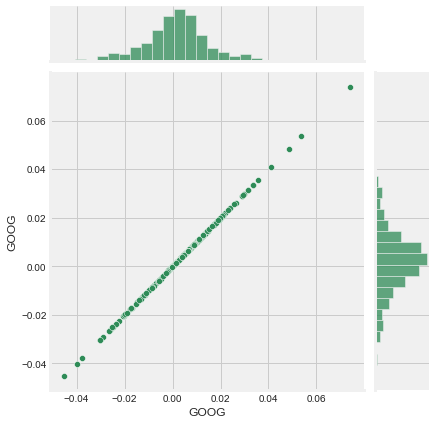

In [17]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


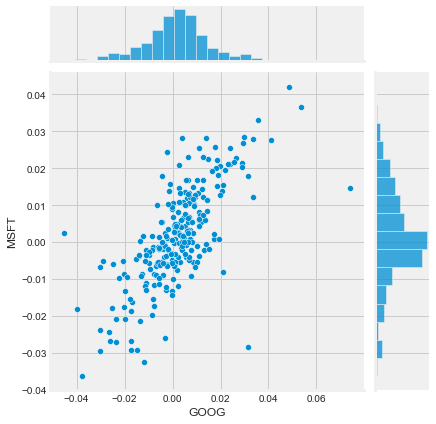

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

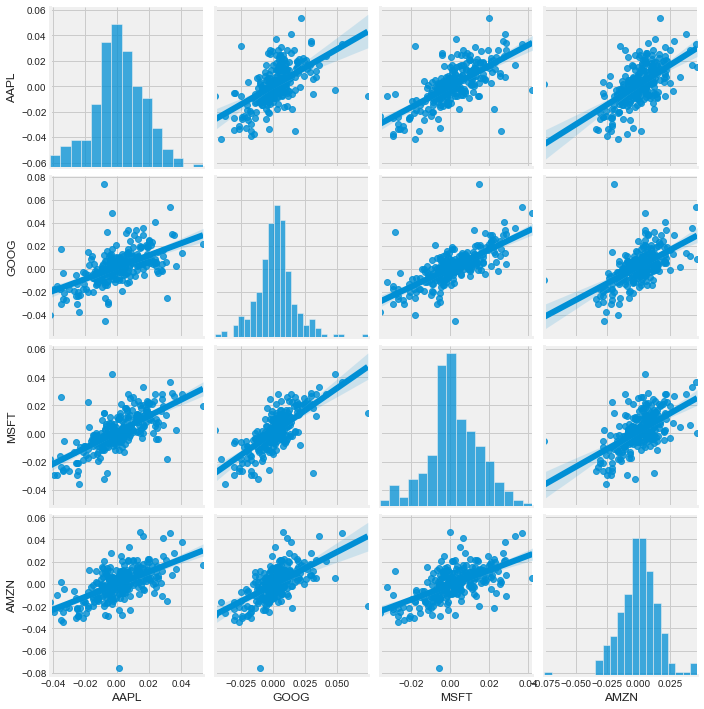

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

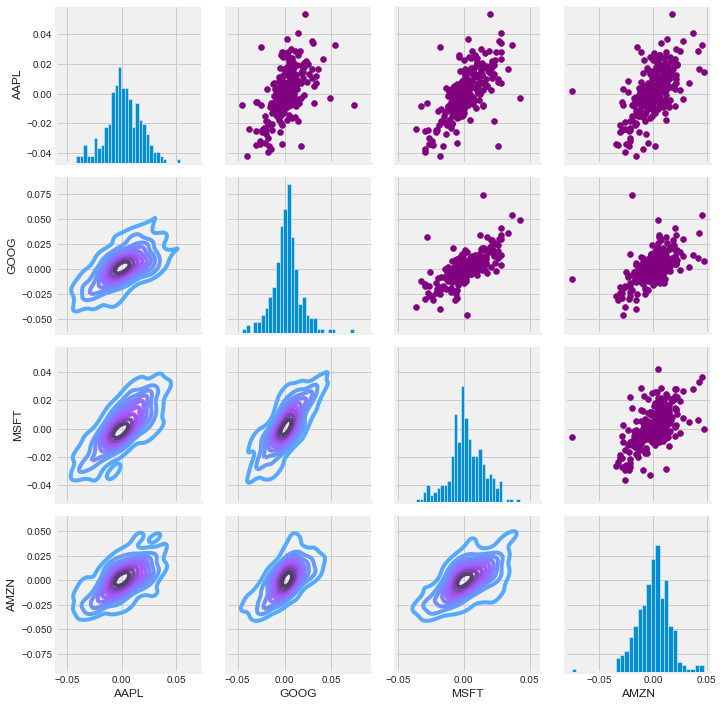

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

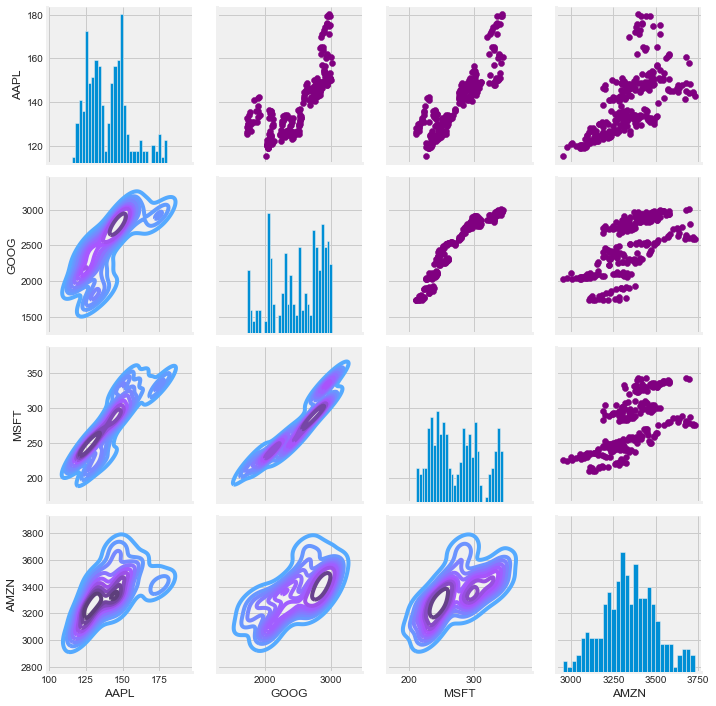

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

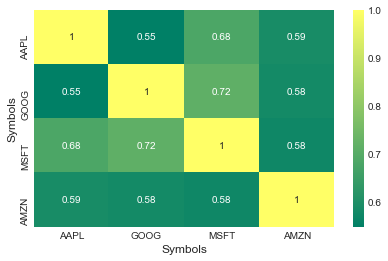

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

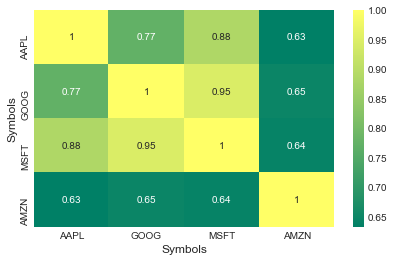

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

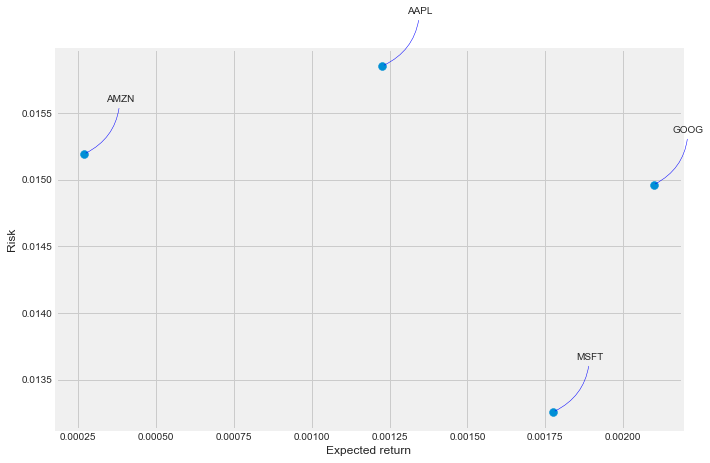

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [25]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591939
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659608
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800154
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933964
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913449
...,...,...,...,...,...,...
2021-12-21,173.199997,169.119995,171.559998,172.990005,91185900.0,172.990005
2021-12-22,175.860001,172.149994,173.039993,175.639999,92135300.0,175.639999
2021-12-23,176.850006,175.270004,175.850006,176.279999,68227500.0,176.279999


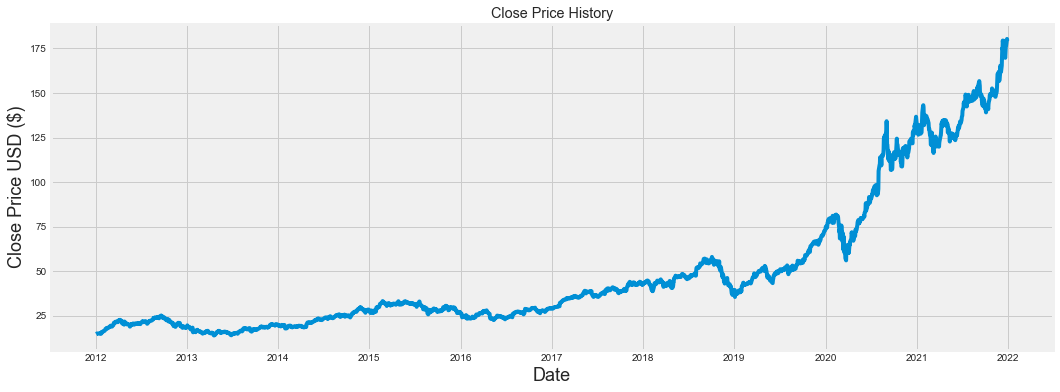

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2389

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00444329],
       [0.00491767],
       [0.00590292],
       ...,
       [0.97565848],
       [1.        ],
       [0.99374929]])

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.00639018, 0.00791635, 0.00641379,
       0.0120484 , 0.01161266, 0.01218148, 0.01341144, 0.01415627,
       0.01409403, 0.01386435, 0.01484316, 0.01576401, 0.01680723,
       0.01849225, 0.02203185, 0.02208551, 0.02405602, 0.02552852,
       0.02299779, 0.0239723 , 0.02395298, 0.0266855 , 0.02629698,
       0.02701606, 0.02830826, 0.02902735, 0.03109874, 0.03260773,
       0.03304348, 0.03319588, 0.03061578, 0.02999328, 0.03008558,
       0.03251115, 0.03319374, 0.03465981, 0.0381157 , 0.04272642,
       0.04186352, 0.04186566, 0.04519921, 0.04624242, 0.04549971,
       0.04482142, 0.04411522, 0.04646135, 0.04807125, 0.04874525])]
[0.047079553022239484]

[array([0.00444329, 0.00491767, 0.00590292, 0.00684095, 0.00669713,
       0.00702125, 0.00687314, 0.00662415, 0.006285  , 0.00733465,
       0.00828126, 0.00798934, 0.0

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2329/2329 [==============================] - 60s 24ms/step - loss: 0.0010


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

15.737358836056991

<ipython-input-32-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


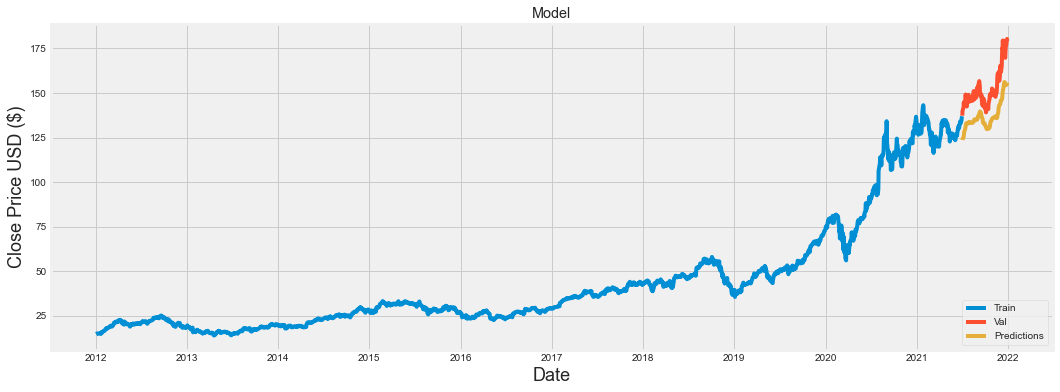

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-07-01,137.270004,123.629372
2021-07-02,139.960007,124.215370
2021-07-06,142.020004,125.019424
2021-07-07,144.570007,126.047554
2021-07-08,143.240005,127.327850
...,...,...
2021-12-21,172.990005,154.910278
2021-12-22,175.639999,154.432999
2021-12-23,176.279999,154.467041
